In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



In [2]:
# Cargar datos
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Visualizar las primeras filas del dataset
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


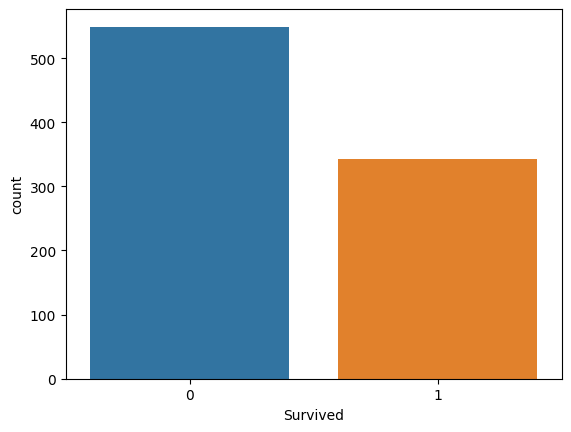

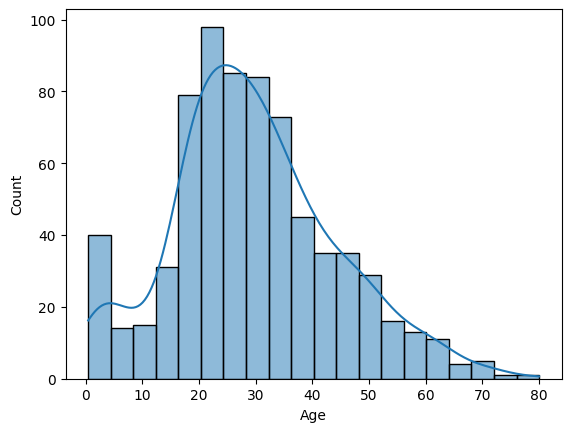

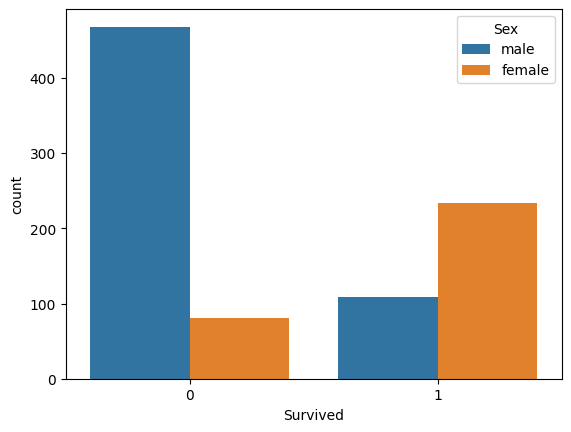

In [3]:
# Distribución de la variable objetivo
sns.countplot(x='Survived', data=train_data)
plt.show()

# Ver la distribución de algunas características
sns.histplot(train_data['Age'].dropna(), kde=True)
plt.show()

# Ver la relación entre la supervivencia y el género
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.show()


In [4]:


# Lidiar con valores nulos
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

# Codificar variables categóricas
label_encoder = LabelEncoder()
# Codificar variables categóricas en el conjunto de entrenamiento
label_encoder_sex = LabelEncoder()
label_encoder_embarked = LabelEncoder()

train_data['Sex'] = label_encoder_sex.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder_embarked.fit_transform(train_data['Embarked'])


# Seleccionar características y la variable objetivo
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_data['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)


In [5]:


# Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_valid)

# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_valid, y_pred)}')
print(classification_report(y_valid, y_pred))


Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [6]:
# Preparar los datos de test
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
# Aplicar el mismo encoder a los datos de test
test_data['Sex'] = label_encoder_sex.transform(test_data['Sex'])
test_data['Embarked'] = label_encoder_embarked.transform(test_data['Embarked'])


# Seleccionar las mismas características que en el conjunto de entrenamiento
X_test = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_test = scaler.transform(X_test)

# Hacer predicciones en el conjunto de test
test_pred = model.predict(X_test)

# Guardar las predicciones en un archivo CSV
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_pred})
output.to_csv('submission.csv', index=False)
print("Predicciones guardadas en submission.csv")


Predicciones guardadas en submission.csv


In [7]:
print(test_data['Sex'].isnull().sum())
print(test_data['Embarked'].isnull().sum())


0
0
